<img src='https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcQ-VfNtOyJbsaxu43Kztf_cv1mgBG6ZIQZEVw&usqp=CAU'>

# Procesamiento de Lenguaje Natural

## Taller #5: TF-IDF
`Fecha de entrega: Marzo 25, 2021. (Antes del inicio de la próxima clase).`

`Modo de entrega: Subir link de GitHub al aula virtual.`

In [40]:
import re
import numpy as np
import pandas as pd

from nltk.corpus import stopwords
stopwords_sp = stopwords.words('spanish')

from nltk.stem.snowball import SnowballStemmer
spanishStemmer=SnowballStemmer("spanish")

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_distances

# Punto 1: Pre-Procesamiento

- `[9 pts]` Leer el archivo `bob_esponja.csv` usando `pandas`
- `[9 pts]` Crear una nueva columna con el texto en minúscula, sin caracteres especiales ni números, sin palabras vacias y hacer stemming de las palabras

In [45]:
data = pd.read_csv("bob_esponja.csv")
data.head(10)

,Personaje,Descripción
0,Bob Esponja Pantalones Cuadrados,Bob Esponja es una esponja de mar con forma re...
1,Patricio Estrella,"Es una estrella de mar de color rosa, el mejor..."
2,Calamardo Tentáculos,Calamardo Tentáculos es un personaje principal...
3,Arenita Mejillas,Arenita Mejillas (Sandy Cheeks en inglés) en u...
4,Eugenio H. Cangrejo,Don Eugenio H. Cangrejo (normalmente llamado S...
5,Sheldon J. Plankton,"Sheldon J. Plankton, o simplemente Plankton, e..."
6,Karen Plankton,Karen Plankton es uno de los dos principales a...
7,Perlita Cangrejo,"Perla ""Perlita"" Cangrejo es un personaje princ..."
8,Sra. Puff,La Señora Puff es un personaje principal de Bo...
9,Gary el Caracol,Gary el Caracol es un personaje principal de B...


Lo primero es copiar la columna a la cual queremos hacer el preprocesado en una nueva columna

In [46]:
data["Preprocesado"] = data["Descripción"]
data.head(10)

,Personaje,Descripción,Preprocesado
0,Bob Esponja Pantalones Cuadrados,Bob Esponja es una esponja de mar con forma re...,Bob Esponja es una esponja de mar con forma re...
1,Patricio Estrella,"Es una estrella de mar de color rosa, el mejor...","Es una estrella de mar de color rosa, el mejor..."
2,Calamardo Tentáculos,Calamardo Tentáculos es un personaje principal...,Calamardo Tentáculos es un personaje principal...
3,Arenita Mejillas,Arenita Mejillas (Sandy Cheeks en inglés) en u...,Arenita Mejillas (Sandy Cheeks en inglés) en u...
4,Eugenio H. Cangrejo,Don Eugenio H. Cangrejo (normalmente llamado S...,Don Eugenio H. Cangrejo (normalmente llamado S...
5,Sheldon J. Plankton,"Sheldon J. Plankton, o simplemente Plankton, e...","Sheldon J. Plankton, o simplemente Plankton, e..."
6,Karen Plankton,Karen Plankton es uno de los dos principales a...,Karen Plankton es uno de los dos principales a...
7,Perlita Cangrejo,"Perla ""Perlita"" Cangrejo es un personaje princ...","Perla ""Perlita"" Cangrejo es un personaje princ..."
8,Sra. Puff,La Señora Puff es un personaje principal de Bo...,La Señora Puff es un personaje principal de Bo...
9,Gary el Caracol,Gary el Caracol es un personaje principal de B...,Gary el Caracol es un personaje principal de B...


Ahora si hacemos el preprocesado, para ellos definimos una función

In [49]:
def preprocesamiento(texto):
    texto = texto.lower()
    texto = re.sub(r"[\W\d_]+", " ", texto)
    texto = [palabra for palabra in texto.split() if palabra not in stopwords_sp]
    texto = " ".join(texto)
    texto = [spanishStemmer.stem(palabra) for palabra in texto.split()]
    texto = " ".join(texto)
    return texto 

Luego, aplicamos dicha función a nuestra columna

In [50]:
data["Preprocesado"] = data["Preprocesado"].apply(lambda texto: preprocesamiento(texto))
data

,Personaje,Descripción,Preprocesado
0,Bob Esponja Pantalones Cuadrados,Bob Esponja es una esponja de mar con forma re...,bob esponj esponj mar form rectangul color ama...
1,Patricio Estrella,"Es una estrella de mar de color rosa, el mejor...",estrell mar color ros mejor amig bob esponj ju...
2,Calamardo Tentáculos,Calamardo Tentáculos es un personaje principal...,calamard tentacul personaj principal bob espon...
3,Arenita Mejillas,Arenita Mejillas (Sandy Cheeks en inglés) en u...,arenit mejill sandy cheeks ingles personaj pri...
4,Eugenio H. Cangrejo,Don Eugenio H. Cangrejo (normalmente llamado S...,don eugeni h cangrej normal llam señor cangrej...
5,Sheldon J. Plankton,"Sheldon J. Plankton, o simplemente Plankton, e...",sheldon j plankton simplement plankton dos ant...
6,Karen Plankton,Karen Plankton es uno de los dos principales a...,kar plankton dos principal antagon bob esponj ...
7,Perlita Cangrejo,"Perla ""Perlita"" Cangrejo es un personaje princ...",perl perlit cangrej personaj principal bob esp...
8,Sra. Puff,La Señora Puff es un personaje principal de Bo...,señor puff personaj principal bob esponj maest...
9,Gary el Caracol,Gary el Caracol es un personaje principal de B...,gary caracol personaj principal bob esponj que...


# Punto 2: TF-IDF

- `[16 pts]` Crear la matriz TF-IDF

In [55]:
data.index = data["Personaje"]

tfidf_vect = TfidfVectorizer()
tfidf = tfidf_vect.fit_transform(data['Preprocesado'].values)

tfidf_matrix = pd.DataFrame(tfidf.toarray(), columns = tfidf_vect.get_feature_names())
tfidf_matrix.index = data.index

tfidf_matrix.T.round(3)

Personaje,Bob Esponja Pantalones Cuadrados,Patricio Estrella,Calamardo Tentáculos,Arenita Mejillas,Eugenio H. Cangrejo,Sheldon J. Plankton,Karen Plankton,Perlita Cangrejo,Sra. Puff,Gary el Caracol
abaj,0.057,0.00,0.000,0.000,0.000,0.0,0.000,0.0,0.000,0.000
aborrec,0.000,0.00,0.091,0.000,0.000,0.0,0.000,0.0,0.000,0.000
acab,0.000,0.00,0.091,0.000,0.000,0.0,0.000,0.0,0.000,0.000
accident,0.049,0.00,0.000,0.000,0.045,0.0,0.000,0.0,0.000,0.000
acept,0.000,0.00,0.000,0.000,0.000,0.0,0.064,0.0,0.000,0.000
...,...,...,...,...,...,...,...,...,...,...
viv,0.000,0.05,0.060,0.108,0.070,0.0,0.000,0.0,0.000,0.000
vol,0.057,0.00,0.000,0.000,0.000,0.0,0.000,0.0,0.000,0.000
voz,0.195,0.00,0.000,0.139,0.000,0.0,0.000,0.0,0.000,0.000
vuelv,0.172,0.00,0.000,0.000,0.000,0.0,0.000,0.0,0.000,0.000


# Punto 3: Distancia del coseno
- `[12 pts]` Calcular la distancia del coseno entre cada una de los personajes
- `[2 pts]` ¿Cuáles son los personajes más parecidos?
- `[2 pts]` ¿Cuáles son los personajes más diferentes?

Calcular la distancia del coseno entre cada una de los personajes

In [70]:
dist_cos = cosine_distances(tfidf_matrix)
dist_cos = pd.DataFrame(dist_cos, columns = tfidf_matrix.index, index = tfidf_matrix.index)
dist_cos

Personaje,Bob Esponja Pantalones Cuadrados,Patricio Estrella,Calamardo Tentáculos,Arenita Mejillas,Eugenio H. Cangrejo,Sheldon J. Plankton,Karen Plankton,Perlita Cangrejo,Sra. Puff,Gary el Caracol
Personaje,,,,,,,,,,
Bob Esponja Pantalones Cuadrados,0.000000,0.826466,0.918853,0.838917,0.868554,0.872613,0.938901,0.886072,0.857937,0.924381
Patricio Estrella,0.826466,0.000000,0.791198,0.841713,0.831869,0.966669,0.930557,0.891881,0.952574,0.895000
Calamardo Tentáculos,0.918853,0.791198,0.000000,0.920036,0.831488,0.917784,0.950219,0.967358,0.968076,0.852161
Arenita Mejillas,0.838917,0.841713,0.920036,0.000000,0.908027,0.967723,0.948562,0.962264,0.972093,0.900968
Eugenio H. Cangrejo,0.868554,0.831869,0.831488,0.908027,0.000000,0.687797,0.892102,0.796912,0.895877,0.920780
Sheldon J. Plankton,0.872613,0.966669,0.917784,0.967723,0.687797,0.000000,0.795121,0.922782,0.986743,0.969443
Karen Plankton,0.938901,0.930557,0.950219,0.948562,0.892102,0.795121,0.000000,0.966336,0.984939,0.965513
Perlita Cangrejo,0.886072,0.891881,0.967358,0.962264,0.796912,0.922782,0.966336,0.000000,0.873928,0.969604
Sra. Puff,0.857937,0.952574,0.968076,0.972093,0.895877,0.986743,0.984939,0.873928,0.000000,0.964203


# ¿Cuáles son los personajes más parecidos?

Los personajes más parecidos (contra todo pronóstico) son Eugenio H. Cangrejo y Sheldon J. Plankton

# ¿Cuáles son los personajes más diferentes?

In [ ]:
Los personajes más diferentes son la Sra. Puff y Sheldon J. Plankton

<AxesSubplot:xlabel='Personaje', ylabel='Personaje'>

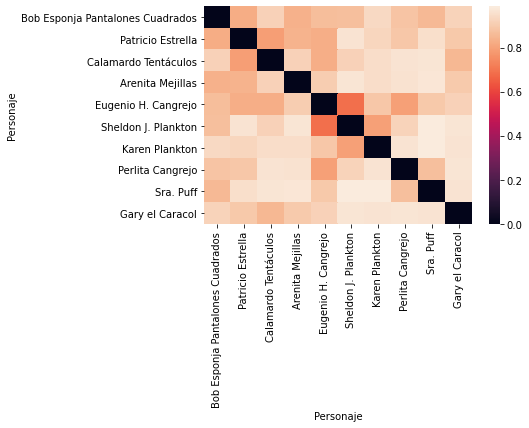

In [73]:
import seaborn as sns

sns.heatmap(dist_cos)